In [19]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = Path("../data/raw/pbp-2024.csv")  # expected default location
nfl_2024_playbyplay = pd.read_csv(DATA_PATH)

In [34]:
# Create figures directory if it doesn't exist
FIGURES_DIR = Path("../reports/figures")
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

def save_fig(name):
    plt.savefig(FIGURES_DIR / f"{name}.png",
                dpi=300,
                bbox_inches="tight")

In [35]:
#check the columns of the dataset
nfl_2024_playbyplay.head()


,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,SeasonYear,Yards,Formation,PlayType,IsTouchdown,IsInterception,IsFumble,YardLineFixed,YardLineDirection,PenaltyTeam
0,2024090500,2024-09-05,1,15,0,BAL,KC,0,0,35,...,2024,0,UNDER CENTER,KICK OFF,0,0,0,65,OPP,NaN
1,2024090500,2024-09-05,1,15,0,BAL,KC,1,10,30,...,2024,2,SHOTGUN,RUSH,0,0,0,30,OWN,NaN
2,2024090500,2024-09-05,1,14,19,BAL,KC,2,8,32,...,2024,2,SHOTGUN,PASS,0,0,0,32,OWN,BAL
3,2024090500,2024-09-05,1,13,55,BAL,KC,2,13,27,...,2024,2,SHOTGUN,PASS,0,0,0,27,OWN,NaN
4,2024090500,2024-09-05,1,13,20,BAL,KC,3,11,29,...,2024,18,SHOTGUN,PASS,0,0,0,29,OWN,NaN


In [36]:
# check the data types of the columns

nfl_2024_playbyplay.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45452 entries, 0 to 45451
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GameId             45452 non-null  int64 
 1   GameDate           45452 non-null  object
 2   Quarter            45452 non-null  int64 
 3   Minute             45452 non-null  int64 
 4   Second             45452 non-null  int64 
 5   OffenseTeam        45452 non-null  object
 6   DefenseTeam        45452 non-null  object
 7   Down               45452 non-null  int64 
 8   ToGo               45452 non-null  int64 
 9   YardLine           45452 non-null  int64 
 10  SeriesFirstDown    45452 non-null  int64 
 11  NextScore          45452 non-null  int64 
 12  Description        45452 non-null  object
 13  TeamWin            45452 non-null  int64 
 14  SeasonYear         45452 non-null  int64 
 15  Yards              45452 non-null  int64 
 16  Formation          44590 non-null  objec

In [37]:
#organize the columns by game id, and then chronological order
nfl_2024_playbyplay = nfl_2024_playbyplay.sort_values(by=['GameId', 'Quarter', 'Minute', 'Second', 'Down'], ascending=[True, True, False, False, True])
nfl_2024_playbyplay

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,SeasonYear,Yards,Formation,PlayType,IsTouchdown,IsInterception,IsFumble,YardLineFixed,YardLineDirection,PenaltyTeam
0,2024090500,2024-09-05,1,15,0,BAL,KC,0,0,35,...,2024,0,UNDER CENTER,KICK OFF,0,0,0,65,OPP,NaN
1,2024090500,2024-09-05,1,15,0,BAL,KC,1,10,30,...,2024,2,SHOTGUN,RUSH,0,0,0,30,OWN,NaN
2,2024090500,2024-09-05,1,14,19,BAL,KC,2,8,32,...,2024,2,SHOTGUN,PASS,0,0,0,32,OWN,BAL
3,2024090500,2024-09-05,1,13,55,BAL,KC,2,13,27,...,2024,2,SHOTGUN,PASS,0,0,0,27,OWN,NaN
4,2024090500,2024-09-05,1,13,20,BAL,KC,3,11,29,...,2024,18,SHOTGUN,PASS,0,0,0,29,OWN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45447,2025012601,2025-01-26,4,1,38,KC,BUF,2,9,65,...,2024,0,UNDER CENTER,RUSH,0,0,0,35,OPP,NaN
45448,2025012601,2025-01-26,4,1,35,KC,BUF,3,9,65,...,2024,17,SHOTGUN,PASS,0,0,0,35,OPP,NaN
45449,2025012601,2025-01-26,4,0,49,KC,BUF,1,10,82,...,2024,0,UNDER CENTER,QB KNEEL,0,0,0,18,OPP,NaN
45450,2025012601,2025-01-26,4,0,20,KC,BUF,2,11,81,...,2024,0,UNDER CENTER,QB KNEEL,0,0,0,19,OPP,NaN


In [ ]:
#drop the columns that are not needed
nfl_2024_playbyplay = nfl_2024_playbyplay.drop(columns=[
    'IsRush', 
    'IsPass', 
    'IsSack', 
    'PassType', 
    'IsIncomplete', 
    'IsChallenge', 
    'IsChallengeReversed', 
    'IsTwoPointConversion', 
    'IsTwoPointConversionSuccessful', 
    'Unnamed: 10',
    'Unnamed: 12',
    'Unnamed: 16',
    'Unnamed: 17',
    'IsMeasurement',
    'Challenger',
    'PenaltyType',
    'PenaltyYards',
    'IsNoPlay',
    'IsPenalty',
    'IsPenaltyAccepted',
    'RushDirection'
])



In [ ]:
nfl_2024_playbyplay = nfl_2024_playbyplay.reset_index(drop=True)
nfl_2024_playbyplay

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,SeasonYear,Yards,Formation,PlayType,IsTouchdown,IsInterception,IsFumble,YardLineFixed,YardLineDirection,PenaltyTeam
0,2024090500,2024-09-05,1,15,0,BAL,KC,0,0,35,...,2024,0,UNDER CENTER,KICK OFF,0,0,0,65,OPP,NaN
1,2024090500,2024-09-05,1,15,0,BAL,KC,1,10,30,...,2024,2,SHOTGUN,RUSH,0,0,0,30,OWN,NaN
2,2024090500,2024-09-05,1,14,19,BAL,KC,2,8,32,...,2024,2,SHOTGUN,PASS,0,0,0,32,OWN,BAL
3,2024090500,2024-09-05,1,13,55,BAL,KC,2,13,27,...,2024,2,SHOTGUN,PASS,0,0,0,27,OWN,NaN
4,2024090500,2024-09-05,1,13,20,BAL,KC,3,11,29,...,2024,18,SHOTGUN,PASS,0,0,0,29,OWN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53278,2025012601,2025-01-26,4,1,35,KC,BUF,0,0,100,...,2024,0,UNDER CENTER,TIMEOUT,0,0,0,0,OPP,NaN
53279,2025012601,2025-01-26,4,1,35,KC,BUF,3,9,65,...,2024,17,SHOTGUN,PASS,0,0,0,35,OPP,NaN
53280,2025012601,2025-01-26,4,0,49,KC,BUF,1,10,82,...,2024,0,UNDER CENTER,QB KNEEL,0,0,0,18,OPP,NaN
53281,2025012601,2025-01-26,4,0,20,KC,BUF,2,11,81,...,2024,0,UNDER CENTER,QB KNEEL,0,0,0,19,OPP,NaN


In [ ]:
# We need to remove all "EXTRA POINT", "TIMEOUT", "2 POINT CONVERSION" plays from the dataset
nfl_2024_playbyplay = nfl_2024_playbyplay.loc[~nfl_2024_playbyplay['PlayType'].isin(['EXTRA POINT', 'TIMEOUT', 'TWO-POINT CONVERSION'])].reset_index(drop=True)
#Remove plays that have "TIMEOUT" in the DESCRIPTION column
nfl_2024_playbyplay = nfl_2024_playbyplay.loc[~nfl_2024_playbyplay['Description'].str.contains('TIMEOUT', na=False)].reset_index(drop=True)

In [39]:
#calculating touchback percentage for 2024
#begin by filtering the playtype for kickoffs
total_kickoffs = nfl_2024_playbyplay.loc[nfl_2024_playbyplay['PlayType'] == 'KICK OFF']



In [40]:
#query the play description for touchbacks
total_kickoffs["TOUCHBACK"] = total_kickoffs["Description"].str.contains('TOUCHBACK', na=False)
total_kickoffs["TOUCHBACK"].sum() 

/var/folders/5x/4m5cfl9j4x1gc07kmkljv6tr0000gn/T/ipykernel_48500/3780382942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_kickoffs["TOUCHBACK"] = total_kickoffs["Description"].str.contains('TOUCHBACK', na=False)


1859

In [41]:
#percentage of kickoffs that were touchbacks
touchback_percentage = (total_kickoffs["TOUCHBACK"].sum() / total_kickoffs.shape[0]) 
print(f"The percentage of total kickoffs that were touchbacks in 2024 was {touchback_percentage*100:.2f}%")

The percentage of total kickoffs that were touchbacks in 2024 was 63.36%


## Preliminary Touchback Percentage Calculation
Initial sorting and filtering reveals that 63.3% of kickoffs this year were touchbacks.  From the article found at this link: https://www.forbes.com/betting/football/nfl/kickoff-rule-change/#:~:text=Kick%20returners%20avoided%20these%20hits,in%20NFL%20history%20(21.8%25). , the 2023 touchback percentage was 79.2%.  So after one year with the dynamic kickoff, there was a clear rise in returned kickoffs.  In the next section we will dive in to how often kickers used the landing zone on their kickoffs versus kicking the ball out.

In [42]:
#the description for kickoffs contains the yard line that the opponent starts at on the next play, 
# using the next play after the kickoff in the main dataset
# to calculate the yard line that the opponent starts at

# Use the index column to find the next play after each kickoff
total_kickoffs['StartingFieldPosition'] = total_kickoffs.index.map(
    lambda idx: nfl_2024_playbyplay.loc[idx + 1, 'YardLine'] if idx + 1 in nfl_2024_playbyplay.index else None
)




/var/folders/5x/4m5cfl9j4x1gc07kmkljv6tr0000gn/T/ipykernel_48500/2203901962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_kickoffs['StartingFieldPosition'] = total_kickoffs.index.map(


In [43]:
## Calculate the average starting field position after kickoffs
print(f'The Average starting field position across all kickoffs in 2024 was the {total_kickoffs["StartingFieldPosition"].mean().round(2)} yard line')

The Average starting field position across all kickoffs in 2024 was the 29.23 yard line


In [44]:
#cleaning data set for starting field positions after that weren't logged correctly



total_touchbacks = total_kickoffs.loc[total_kickoffs["TOUCHBACK"] == True]
#show touchbacks that weren't to the 20 or the 30
total_touchbacks_abnormal = (total_touchbacks
.loc[~total_touchbacks["StartingFieldPosition"]
.isin([20, 30]) & total_touchbacks["PenaltyTeam"].isna()]
.sort_values(by="StartingFieldPosition", ascending=True))
total_touchbacks_abnormal["StartingFieldPosition"].value_counts()
#The starting field positions of 25,15, and can be explained by penalties that occured during the kickoff, 
# the other values are likely errors in the dataset or missing plays



25    6
15    4
2     2
0     1
33    1
35    1
Name: StartingFieldPosition, dtype: int64

In [45]:
# Update the StartingFieldPosition for specific values in total_touchbacks_abnormal
total_touchbacks_abnormal.loc[
    total_touchbacks_abnormal["StartingFieldPosition"].isin([2, 0, 33, 35]), 
    "StartingFieldPosition"
] = 30

# Ensure total_touchbacks_abnormal is defined
if 'total_touchbacks_abnormal' not in locals():
    total_touchbacks_abnormal = total_kickoffs.loc[
        ~total_kickoffs["StartingFieldPosition"].isin([20, 30]) & total_kickoffs["PenaltyTeam"].isna()
    ].sort_values(by="StartingFieldPosition", ascending=True)

# Identify the indices of abnormal touchbacks with StartingFieldPosition as 70
indices_with_70 = total_touchbacks_abnormal.loc[
    total_touchbacks_abnormal["StartingFieldPosition"] == 70
].index

# Adjust the YardLine for the entire drive for these indices
for idx in indices_with_70:
    # Find the drive plays in the main dataset
    # Remove the games with StartingFieldPosition as 70 from all dataframes
    game_ids_to_remove = total_touchbacks_abnormal.loc[
        total_touchbacks_abnormal["StartingFieldPosition"] == 70, "GameId"
    ].unique()

    # Filter out the games from the main dataframe
    nfl_2024_playbyplay = nfl_2024_playbyplay.loc[
        ~nfl_2024_playbyplay["GameId"].isin(game_ids_to_remove)
    ].reset_index(drop=True)

    # Filter out the games from the total_kickoffs dataframe
    total_kickoffs = total_kickoffs.loc[
        ~total_kickoffs["GameId"].isin(game_ids_to_remove)
    ].reset_index(drop=True)

    # Filter out the games from the total_touchbacks_abnormal dataframe
    total_touchbacks_abnormal = total_touchbacks_abnormal.loc[
        ~total_touchbacks_abnormal["GameId"].isin(game_ids_to_remove)
    ].reset_index(drop=True)



# Check the updated YardLine values for the drive
total_touchbacks_abnormal["StartingFieldPosition"].value_counts()



25    6
30    5
15    4
Name: StartingFieldPosition, dtype: int64

In [46]:
#abnormal touchback investigation
# Create a list to store the indices of plays before, during, and after each abnormal touchback

indices = []
for idx in total_touchbacks_abnormal.index:
    if idx - 1 in nfl_2024_playbyplay.index:
        indices.append(idx - 1)
    indices.append(idx)
    if idx + 1 in nfl_2024_playbyplay.index:
        indices.append(idx + 1)
    if idx + 2 in nfl_2024_playbyplay.index:
        indices.append(idx + 2)

# Filter the main dataframe using the collected indices
abnormal_investigation = nfl_2024_playbyplay.loc[indices].sort_index()

# Export the dataframe to a CSV file
abnormal_investigation.to_csv('abnormal_investigation_9.csv', index=False)

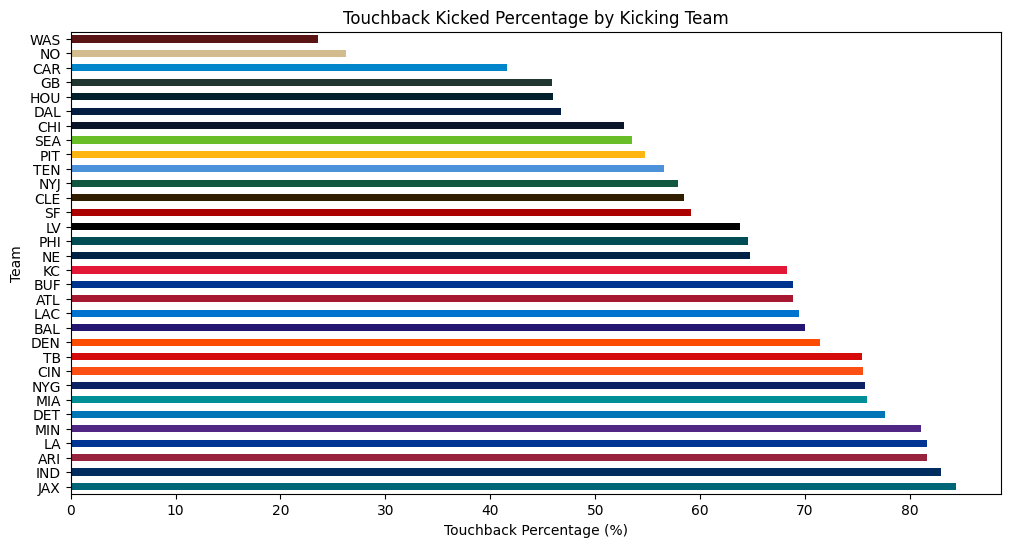

In [55]:

#for more in depth analysis, we'll plot the touchback percentage by team using a pivot table
# Create a pivot table to calculate touchback percentage by kicking team
# Mapping of NFL team abbreviations to hex color codes (alphabetically ordered)
nfl_colors = {
    "ARI": "#97233F",
    "ATL": "#A71930",
    "BAL": "#241773",
    "BUF": "#00338D",
    "CAR": "#0085CA",
    "CHI": "#0B162A",
    "CIN": "#FB4F14",
    "CLE": "#311D00",
    "DAL": "#041E42",
    "DEN": "#FC4C02",
    "DET": "#0076B6",
    "GB": "#203731",
    "HOU": "#03202F",
    "IND": "#002C5F",
    "JAX": "#006778",
    "KC": "#E31837",
    "LAC": "#0073CF",
    "LA": "#003594",
    "LV": "#000000",
    "MIA": "#008E97",
    "MIN": "#4F2683",
    "NE": "#002244",
    "NO": "#D3BC8D",
    "NYG": "#0B2265",
    "NYJ": "#125740",
    "PHI": "#004C54",
    "PIT": "#FFB612",
    "SEA": "#69BE28",
    "SF": "#AA0000",
    "TB": "#D50A0A",
    "TEN": "#4B92DB",
    "WAS": "#5A1414"
}

kicking_team_touchback_pivot = total_kickoffs.pivot_table(
    index='DefenseTeam',
    values='TOUCHBACK',
    aggfunc=lambda x: ((x == True).sum() / len(x))* 100
).sort_values(by='TOUCHBACK', ascending=False)
# Use the color mapping for the bars
colors = [nfl_colors[team] for team in kicking_team_touchback_pivot.index]

# Convert the pivot table to a Series (assuming the column is named 'TOUCHBACK')
kicking_team_touchback_series = kicking_team_touchback_pivot['TOUCHBACK']

x_return_team_touchback_pivot = total_kickoffs.pivot_table(
    index='OffenseTeam',
    values='TOUCHBACK',
    aggfunc=lambda x: ((x == True).sum() / len(x))* 100
).sort_values(by='TOUCHBACK', ascending=False)

x_return_team_touchback_series = x_return_team_touchback_pivot['TOUCHBACK']

# Plot the Series so that the colors list is applied to each bar individually
kicking_team_touchback_series.plot.barh(
    title='Touchback Kicked Percentage by Kicking Team',
    ylabel='Team',
    xlabel='Touchback Percentage (%)',
    figsize=(12, 6),
    color=colors  # Now each bar gets its own color from the list
)

save_fig("kicking_team_touchback_percentage")

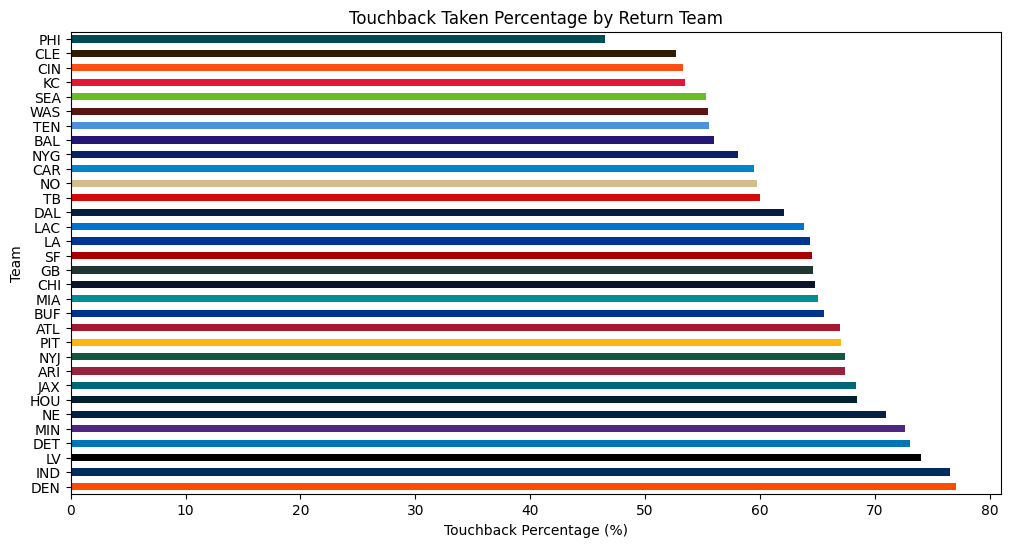

In [59]:
#compare that with touchback taken percentage by return team
x_return_team_touchback_pivot = total_kickoffs.pivot_table(
    index='OffenseTeam',
    values='TOUCHBACK',
    aggfunc=lambda x: ((x == True).sum() / len(x))* 100
).sort_values(by='TOUCHBACK', ascending=False)
# Use the color mapping for the bars
colors = [nfl_colors[team] for team in x_return_team_touchback_pivot.index]

# Convert the pivot table to a Series (assuming the column is named 'TOUCHBACK')
x_return_team_touchback_series = x_return_team_touchback_pivot['TOUCHBACK']

# Plot the Series so that the colors list is applied to each bar individually
x_return_team_touchback_series.plot.barh(
    title='Touchback Taken Percentage by Return Team',
    ylabel='Team',
    xlabel='Touchback Percentage (%)',
    figsize=(12, 6),
    color=colors  # Now each bar gets its own color from the list
)
save_fig("return_team_touchback_taken_percentage")

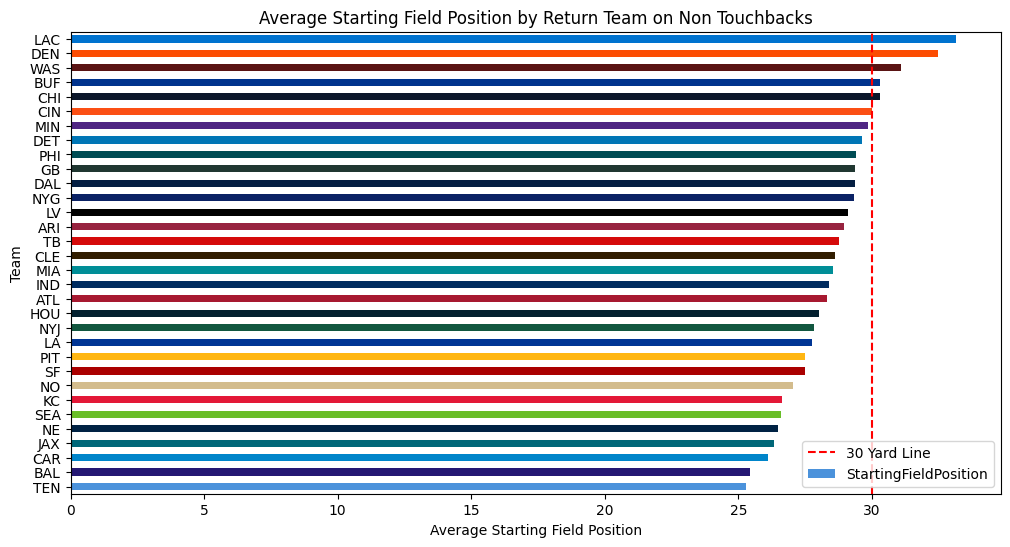

In [75]:
#now for which teams had the best returns on kickoffs
# Create a pivot table to calculate average starting field position by team on non touchback kickoffs
# Filter out touchbacks
non_touchbacks = total_kickoffs.loc[total_kickoffs["TOUCHBACK"] == False]
# Calculate average starting field position by team
x_return_team_pivot = non_touchbacks.pivot_table(
    index='OffenseTeam',
    values='StartingFieldPosition',
    aggfunc= 'mean'
).sort_values(by='StartingFieldPosition', ascending=True)
# Use the color mapping for the bars
colors = [nfl_colors[team] for team in x_return_team_pivot.index]
# Convert the pivot table to a Series (assuming the column is named 'StartingFieldPosition')
x_return_series = x_return_team_pivot['StartingFieldPosition']
# Plot the Series so that the colors list is applied to each bar individually
x_return_series.plot.barh(
    title='Average Starting Field Position by Return Team on Non Touchbacks',
    ylabel='Team',
    xlabel='Average Starting Field Position',
    figsize=(12, 6),
    color=colors  # Now each bar gets its own color from the list
)
#add red line at the 30 yard line to show which teams are at an advantage with the new rule
plt.axvline(x=30, color='red', linestyle='--', label='30 Yard Line')
plt.legend()
save_fig("return_team_average_starting_field_position_non_touchbacks")

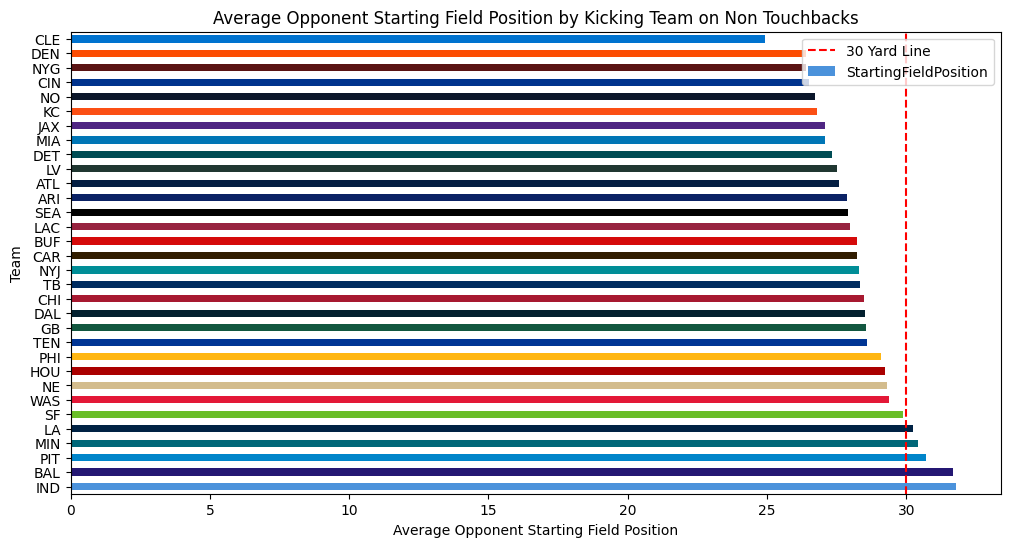

In [76]:
#now for which teams were the best at defending kickoff returns
# Create a pivot table to calculate average starting field position by team on non touchback kickoffs
# Filter out touchbacks
non_touchbacks = total_kickoffs.loc[total_kickoffs["TOUCHBACK"] == False]
# Calculate average starting field position by team
kicking_team_pivot = non_touchbacks.pivot_table(
    index='DefenseTeam',
    values='StartingFieldPosition',
    aggfunc= 'mean'
).sort_values(by='StartingFieldPosition', ascending=False)
# Use the color mapping for the bars
colors = [nfl_colors[team] for team in x_return_team_pivot.index]
# Convert the pivot table to a Series (assuming the column is named 'StartingFieldPosition')
kicking_series = kicking_team_pivot['StartingFieldPosition']
# Plot the Series so that the colors list is applied to each bar individually
kicking_series.plot.barh(
    title='Average Opponent Starting Field Position by Kicking Team on Non Touchbacks',
    ylabel='Team',
    xlabel='Average Opponent Starting Field Position',
    figsize=(12, 6),
    color=colors  # Now each bar gets its own color from the list
)
plt.axvline(x=30, color='red', linestyle='--', label='30 Yard Line')
plt.legend()
save_fig("kicking_team_average_opponent_starting_field_position_non_touchbacks")

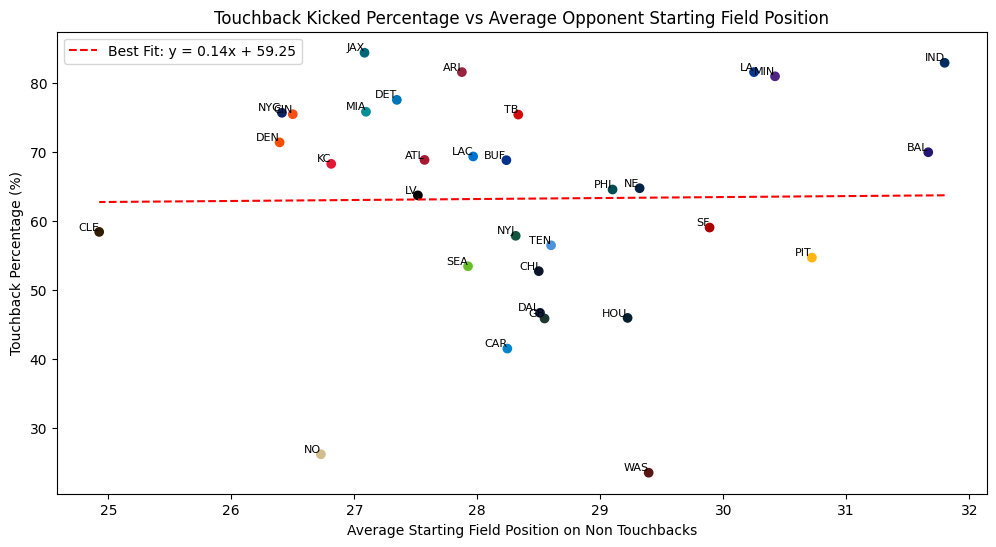

In [79]:
#scatter plot of touchback percentage by average starting field position
#first join touchback series and return series
kicking_vs_touchback = pd.concat([kicking_series, kicking_team_touchback_series], axis=1)
# Rename the columns
kicking_vs_touchback.columns = ['Average Opponent Starting Field Position off of Returns', 'Touchback Kicked Percentage']


# Plot the scatter plot
# Use the color mapping for the points
colors = [nfl_colors[team] for team in kicking_vs_touchback.index]



import matplotlib.pyplot as plt

# Extract x and y values
x = kicking_vs_touchback['Average Opponent Starting Field Position off of Returns']
y = kicking_vs_touchback['Touchback Kicked Percentage']

# Fit a line of best fit
m, b = np.polyfit(x, y, 1)

# Plot the scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y, color=colors)

# Plot the line of best fit
ax.plot(x, m * x + b, color='red', linestyle='--', label=f'Best Fit: y = {m:.2f}x + {b:.2f}')

# Annotate each point with the team name
for team, (x_val, y_val) in kicking_vs_touchback.iterrows():
    ax.text(x_val, y_val, team, fontsize=8, ha='right', va='bottom')

# Add labels, title, and legend
ax.set_title('Touchback Kicked Percentage vs Average Opponent Starting Field Position')
ax.set_xlabel('Average Starting Field Position on Non Touchbacks')
ax.set_ylabel('Touchback Percentage (%)')
ax.legend()

save_fig("touchback_kicked_vs_average_starting_field_position")
plt.show()

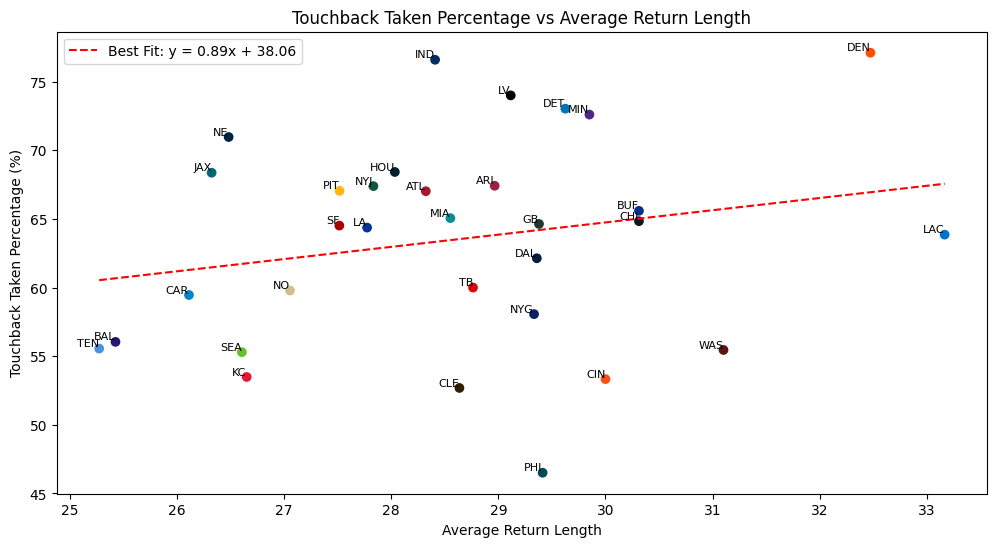

In [78]:
# Extract x and y values
# First join touchback series and return series
x_return_vs_touchback = pd.concat([x_return_series, x_return_team_touchback_series], axis=1)
# Rename the columns
x_return_vs_touchback.columns = ['Average Return Length', 'Touchback Taken Percentage']

# Plot the scatter plot
# Use the color mapping for the points
colors = [nfl_colors[team] for team in x_return_vs_touchback.index]

import matplotlib.pyplot as plt

# Extract x and y values
x = x_return_vs_touchback['Average Return Length']
y = x_return_vs_touchback['Touchback Taken Percentage']

# Fit a line of best fit
m, b = np.polyfit(x, y, 1)

# Plot the scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y, color=colors)

# Plot the line of best fit
ax.plot(x, m * x + b, color='red', linestyle='--', label=f'Best Fit: y = {m:.2f}x + {b:.2f}')

# Annotate each point with the team name
for team, (x_val, y_val) in x_return_vs_touchback.iterrows():
    ax.text(x_val, y_val, team, fontsize=8, ha='right', va='bottom')

# Add labels, title, and legend
ax.set_title('Touchback Taken Percentage vs Average Return Length')
ax.set_xlabel('Average Return Length')
ax.set_ylabel('Touchback Taken Percentage (%)')
ax.legend()
save_fig("touchback_taken_vs_average_return_length")

plt.show()


## Insights from the Above Scatter Plot
We can see that there is a slight correlation between how good a team is on their returns and the amount of touchbacks they take.  Teams are far less likely to allow teams with good return units the chance at a big play, and will do their best to prevent their returner from taking the ball out.  Another conclusion is that while the ball certainly was more in play this season, the league probably wants the touchback taken % to be even lower, hence moving the touchback starting field position to the 35 yard line for the 2025 season.  With this change, there is now no team that would get better field position on average from returns than taking a touchback, which will force teams to kick into the landing zone more, generating more returns.

## Risk Reward of Attempting the landing zone touchback

A critical element of the new rule is that for kickoffs that land in the landing zone before going out of the back of the end zone for being kneeled, the ball would get placed at the 20 instead of the 30.  This also encourages the kickers to put the ball in play, but opens up additional risks of returns, as well as kicking the ball out of bounds when trying to do "coffin corner" (kicking the ball into the corner to prevent the returner from being able to catch it, but without kicking it out of the sidelines) style kicks.  Kicks that go out of bounds are placed at the 40.  To analyze these risks and rewards, we need to analyze average drive lengths, scoring rates, and field position.

In [67]:


# Create a new column to identify field goals
nfl_2024_playbyplay["IsFieldGoal"] = nfl_2024_playbyplay["PlayType"] == "FIELD GOAL"

# We don't want to consider yards gained on kickoffs or punts
filtered_for_drive = nfl_2024_playbyplay.loc[
    (nfl_2024_playbyplay['PlayType'] != 'KICK OFF') &
    (nfl_2024_playbyplay['PlayType'] != 'PUNT')
]

# Define a new drive when possession changes or game changes or it's a kickoff
new_drive = (
    (filtered_for_drive['GameId'] != filtered_for_drive['GameId'].shift(1)) |
    (filtered_for_drive['OffenseTeam'] != filtered_for_drive['OffenseTeam'].shift(1))

)

# Create a unique drive ID using cumulative sum of the new_drive flag
filtered_for_drive['drive_id'] = new_drive.cumsum()
filtered_for_drive.head(5)




/var/folders/5x/4m5cfl9j4x1gc07kmkljv6tr0000gn/T/ipykernel_48500/3701449659.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_for_drive['drive_id'] = new_drive.cumsum()


,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,Formation,PlayType,IsTouchdown,IsInterception,IsFumble,YardLineFixed,YardLineDirection,PenaltyTeam,IsFieldGoal,drive_id
1,2024090500,2024-09-05,1,15,0,BAL,KC,1,10,30,...,SHOTGUN,RUSH,0,0,0,30,OWN,NaN,False,1
2,2024090500,2024-09-05,1,14,19,BAL,KC,2,8,32,...,SHOTGUN,PASS,0,0,0,32,OWN,BAL,False,1
3,2024090500,2024-09-05,1,13,55,BAL,KC,2,13,27,...,SHOTGUN,PASS,0,0,0,27,OWN,NaN,False,1
4,2024090500,2024-09-05,1,13,20,BAL,KC,3,11,29,...,SHOTGUN,PASS,0,0,0,29,OWN,NaN,False,1
5,2024090500,2024-09-05,1,12,43,BAL,KC,1,10,47,...,UNDER CENTER,RUSH,0,0,0,47,OWN,NaN,False,1


In [70]:
# Create a pivot table of information that will be useful to know about each drive
# ensure we have a column containing the original dataframe index so we can record start/end play ids
filtered_for_drive = filtered_for_drive.assign(play_index=filtered_for_drive.index)

drive_stats = filtered_for_drive.groupby(['GameId', 'drive_id']).agg(
    start_yardline=('YardLineFixed', 'first'),
    end_yardline=('YardLineFixed', 'last'),
    total_yards=('Yards', 'sum'),
    start_play_id=('play_index', 'first'),
    end_play_id=('play_index', 'last'),
    touchdown=('IsTouchdown', 'max'),
    field_goal=('IsFieldGoal', 'max'),
)

In [71]:
# Calculate the average yards gained per drive
avg_yards_per_drive = drive_stats['total_yards'].mean()
print(f"Average yards gained per drive: {avg_yards_per_drive:.2f}")

Average yards gained per drive: 34.61


## Analysis of Average yards gained per drive
With the average yards gained per drive being 34 yards, and the average starting field position after the kickoff being the 29 yard line, this means that the average drive ends at the opposite 37 yard line, which is a 54 yard field goal attempt, right on the edge of most kickers range (analysis of this shown below).  Therefore, based on average league drive statistics, the difference of 5 yards of starting field position could mean the difference between scoring points or not on a drive.  Obviosuly, from team to team, from game to game there are far more variables that impact whether a team will score more than whether the kickoff was a touchback or not, but I think normalizing across all teams in the league from good to bad offenses demonstrates the effect of this rule

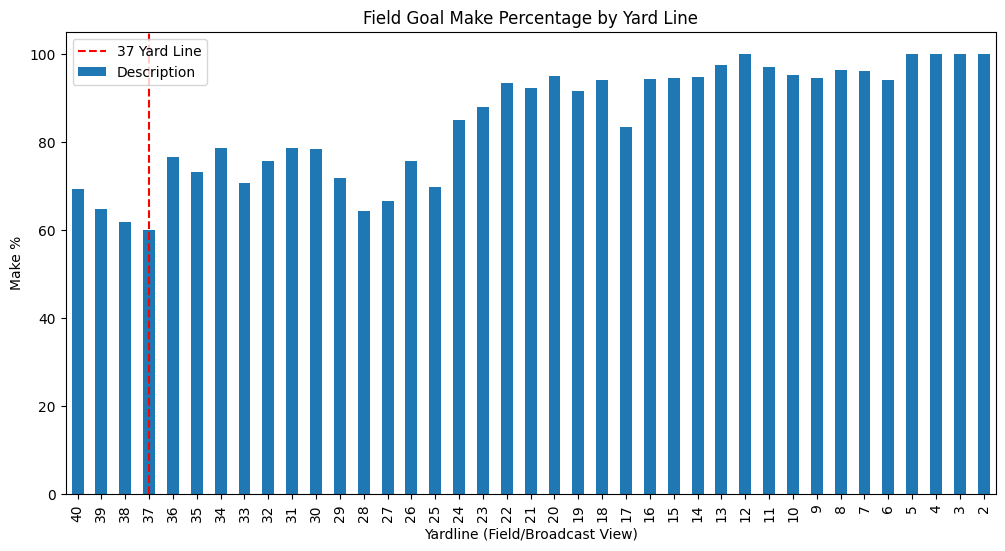

In [72]:
#plotting field goal make % vs yardline
# Create a pivot table to calculate field goal make percentage by yard line
field_goal_attempts = nfl_2024_playbyplay.loc[
    nfl_2024_playbyplay['PlayType'] == 'FIELD GOAL']

# Filter yardlines with more than 5 attempts
filtered_field_goal_attempts = field_goal_attempts.groupby('YardLineFixed').filter(
    lambda x: x['Description'].str.contains('FIELD GOAL', case=False, na=False).sum() > 5
)

# Calculate field goal make percentage by yard line
field_goal_make_percentage = filtered_field_goal_attempts.pivot_table(
    index='YardLineFixed',
    values='Description',
    aggfunc=lambda x: (x.str.contains('IS GOOD', case=False, na=False).sum() / x.str.contains('FIELD GOAL', case=False, na=False).sum()) * 100
).sort_index(ascending=True)

# Convert the pivot table to a Series (assuming the column is named 'Description')

# Adjust the yardline to represent the field/broadcast view
field_goal_make_percentage.index = 100 - field_goal_make_percentage.index

# Plot the adjusted field goal make percentage
field_goal_make_percentage.loc[field_goal_make_percentage.index < 60].plot.bar(
    title='Field Goal Make Percentage by Yard Line',
    xlabel='Yardline (Field/Broadcast View)',
    ylabel='Make %',
    figsize=(12, 6),
)
# Add a red vertical line at the 37-yard line
plt.axvline(x=3, color='red', linestyle='--', label='37 Yard Line')
plt.legend()

save_fig("field_goal_make_percentage_by_yard_line")



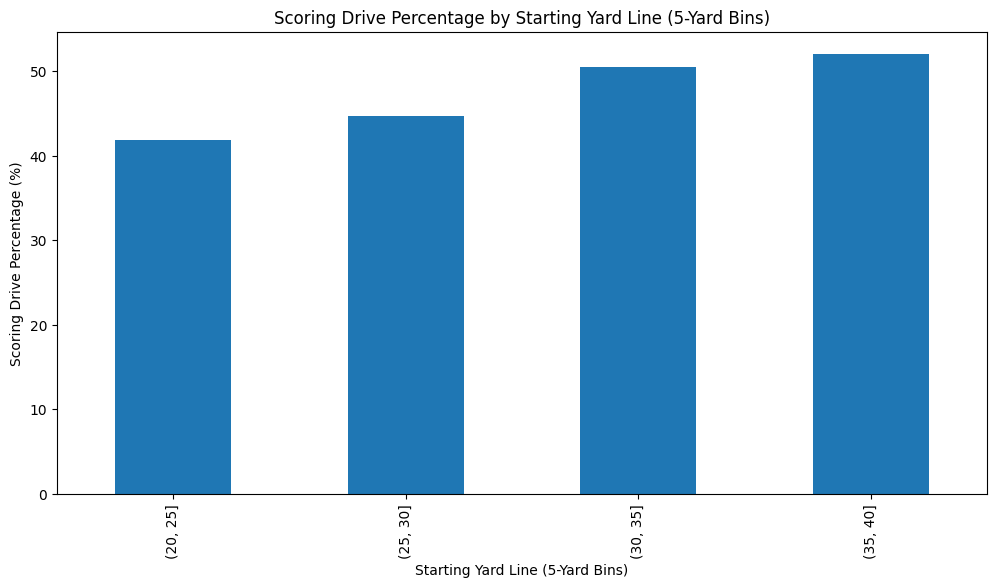

In [73]:
#now lets show scoring likelihood based on field position
# Create a pivot table to calculate scoring drive percentage by starting yard line

scoring_drive_percentage = drive_stats.pivot_table(
    index='start_yardline',
    values=['touchdown', 'field_goal'],
    aggfunc=lambda x: ((x > 0).sum() / len(x)) * 100
).sort_index(ascending=True)

# Create bins for 5-yard intervals
bins = range(20, 45, 5)
scoring_drive_percentage['total_scoring'] = scoring_drive_percentage['field_goal'] + scoring_drive_percentage['touchdown']

# Group by bins and calculate the mean scoring percentage for each bin
binned_scoring = scoring_drive_percentage.loc[20:40].groupby(
    pd.cut(scoring_drive_percentage.loc[20:40].index, bins)
)['total_scoring'].mean()

# Plot the histogram
binned_scoring.plot.bar(
    title='Scoring Drive Percentage by Starting Yard Line (5-Yard Bins)',
    xlabel='Starting Yard Line (5-Yard Bins)',
    ylabel='Scoring Drive Percentage (%)',
    figsize=(12, 6),
)

save_fig("scoring_drive_percentage_by_starting_yard_line_bins")

In [74]:
# Filter scoring likelihood for drives starting at the 40 and 20-yard lines
scoring_40 = scoring_drive_percentage.loc[40, 'total_scoring']
scoring_30 = scoring_drive_percentage.loc[30, 'total_scoring']
scoring_20 = scoring_drive_percentage.loc[20, 'total_scoring']

print(f"Scoring likelihood for drives starting at the 40-yard line: {scoring_40:.2f}%")
print(f"Scoring likelihood for drives starting at the 30-yard line: {scoring_30:.2f}%")
print(f"Scoring likelihood for drives starting at the 20-yard line: {scoring_20:.2f}%")

Scoring likelihood for drives starting at the 40-yard line: 52.22%
Scoring likelihood for drives starting at the 30-yard line: 45.68%
Scoring likelihood for drives starting at the 20-yard line: 34.78%
